In [424]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd



# Data Cleaning

In [425]:
df = pd.read_csv('imdb_scraping.csv')
df

,Unnamed: 0,titles,year,imdb_ratings,text_muted1,text_muted2,text_muted3,meta_scores,director,stars
0,0,The Shawshank Redemption,(1994),9.3,\nR\n|\n142 min\n|\n\nDrama \n,\nTwo imprisoned men bond over a number of yea...,"\nVotes:\n2,647,314\n| Gross:\n$28.34M\n",81.0,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'..."
1,1,The Godfather,(1972),9.2,"\n175 min\n|\n\nCrime, Drama \n",\nThe aging patriarch of an organized crime dy...,"\nVotes:\n1,835,072\n| Gross:\n$134.97M\n",100.0,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '..."
2,2,The Dark Knight,(2008),9.0,"\nPG-13\n|\n152 min\n|\n\nAction, Crime, Drama...",\nWhen the menace known as the Joker wreaks ha...,"\nVotes:\n2,619,277\n| Gross:\n$534.86M\n",84.0,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
3,3,The Lord of the Rings: The Return of the King,(2003),9.0,"\nPG-13\n|\n201 min\n|\n\nAction, Adventure, D...",\nGandalf and Aragorn lead the World of Men ag...,"\nVotes:\n1,823,184\n| Gross:\n$377.85M\n",94.0,['Peter Jackson'],"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell..."
4,4,Schindler's List,(1993),9.0,"\nR\n|\n195 min\n|\n\nBiography, Drama, Histor...",\nIn German-occupied Poland during World War I...,"\nVotes:\n1,341,758\n| Gross:\n$96.90M\n",94.0,['Steven Spielberg'],"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley..."
...,...,...,...,...,...,...,...,...,...,...
9895,9895,Superbabies: Baby Geniuses 2,(2004),1.5,"\nPG\n|\n88 min\n|\n\nComedy, Family, Sci-Fi ...",\nA group of smart-talking toddlers find thems...,"\nVotes:\n31,108\n| Gross:\n$9.11M\n",9.0,['Bob Clark'],"['Jon Voight', 'Scott Baio', 'Vanessa Angel', ..."
9896,9896,Saving Christmas,(2014),1.3,"\nPG\n|\n79 min\n|\n\nComedy, Family ...",\nHis annual Christmas party faltering thanks ...,"\nVotes:\n15,947\n| Gross:\n$2.78M\n",18.0,['Darren Doane'],"['Kirk Cameron', 'Darren Doane', 'Bridgette Ca..."
9897,9897,Foodfight!,(2012),1.3,"\nPG\n|\n91 min\n|\n\nAnimation, Action, Adven...",\nThe evil Brand X joins a supermarket that be...,"\nVotes:\n11,045\n",NaN,['Lawrence Kasanoff'],"['Hilary Duff', 'Haylie Duff', 'Charlie Sheen'..."
9898,9898,Smolensk,(2016),1.2,"\n120 min\n|\n\nDrama, Thriller \n",\nAn inspired story of people affected by the ...,"\nVotes:\n39,697\n",NaN,['Antoni Krauze'],"['Beata Fido', 'Maciej Póltorak', 'Aldona Stru..."


In [426]:
df['year']=df['year'].str.extract('(\d+)').astype(int)
df['year']

0       1994
1       1972
2       2008
3       2003
4       1993
        ... 
9895    2004
9896    2014
9897    2012
9898    2016
9899    2022
Name: year, Length: 9900, dtype: int32

In [427]:
df['text_muted1'] = df['text_muted1'].str.replace(r'\n', '')
df['text_muted1']

0                             R|142 min|Drama            
1                        175 min|Crime, Drama            
2          PG-13|152 min|Action, Crime, Drama            
3       PG-13|201 min|Action, Adventure, Drama        ...
4         R|195 min|Biography, Drama, History            
                              ...                        
9895         PG|88 min|Comedy, Family, Sci-Fi            
9896                 PG|79 min|Comedy, Family            
9897    PG|91 min|Animation, Action, Adventure        ...
9898                  120 min|Drama, Thriller            
9899                             48 min|Drama            
Name: text_muted1, Length: 9900, dtype: object

In [428]:

dfm1 = df['text_muted1'].str.split('|', 2, expand=True)
dfm1

,0,1,2
0,R,142 min,Drama
1,175 min,"Crime, Drama",None
2,PG-13,152 min,"Action, Crime, Drama"
3,PG-13,201 min,"Action, Adventure, Drama"
4,R,195 min,"Biography, Drama, History"
...,...,...,...
9895,PG,88 min,"Comedy, Family, Sci-Fi"
9896,PG,79 min,"Comedy, Family"
9897,PG,91 min,"Animation, Action, Adventure"
9898,120 min,"Drama, Thriller",None


In [429]:
rating=[]
runtime = []
genre=[]

for i in range(len(dfm1)):
    rating.append(None if dfm1[0][i].find('min') >0 else dfm1[0][i])
    runtime.append(dfm1[0][i] if dfm1[0][i].find('min') >0 else dfm1[1][i])
    genre.append(dfm1[2][i] if dfm1[1][i].find('min') >0 else dfm1[1][i])
genre = [w.replace(' ', '') for w in genre]
dfm1 = pd.DataFrame({'rating': rating,
                   'genre': genre,
                   'runtime': runtime,
                   })


In [430]:
df['brief'] = df['text_muted2'].str.replace(r'\n', '')


In [431]:
df['text_muted3']=df['text_muted3'].str.replace(r'\n', '')
dfm2 = df['text_muted3'].str.split('|', 2, expand=True)
dfm2.columns=['votes','gross']

In [432]:
dfm2['votes']=dfm2.votes.str[6:]
dfm2['gross']=dfm2.gross.str[8:-1]
dfm2


,votes,gross
0,"2,647,314",28.34
1,"1,835,072",134.97
2,"2,619,277",534.86
3,"1,823,184",377.85
4,"1,341,758",96.90
...,...,...
9895,"31,108",9.11
9896,"15,947",2.78
9897,"11,045",None
9898,"39,697",None


In [433]:
df = df.join(dfm1, how="right")



In [434]:
df = df.join(dfm2, how="right")
df

,Unnamed: 0,titles,year,imdb_ratings,text_muted1,text_muted2,text_muted3,meta_scores,director,stars,brief,rating,genre,runtime,votes,gross
0,0,The Shawshank Redemption,1994,9.3,R|142 min|Drama,\nTwo imprisoned men bond over a number of yea...,"Votes:2,647,314| Gross:$28.34M",81.0,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Two imprisoned men bond over a number of years...,R,Drama,142 min,"2,647,314",28.34
1,1,The Godfather,1972,9.2,"175 min|Crime, Drama",\nThe aging patriarch of an organized crime dy...,"Votes:1,835,072| Gross:$134.97M",100.0,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...",The aging patriarch of an organized crime dyna...,None,"Crime,Drama",175 min,"1,835,072",134.97
2,2,The Dark Knight,2008,9.0,"PG-13|152 min|Action, Crime, Drama",\nWhen the menace known as the Joker wreaks ha...,"Votes:2,619,277| Gross:$534.86M",84.0,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",When the menace known as the Joker wreaks havo...,PG-13,"Action,Crime,Drama",152 min,"2,619,277",534.86
3,3,The Lord of the Rings: The Return of the King,2003,9.0,"PG-13|201 min|Action, Adventure, Drama ...",\nGandalf and Aragorn lead the World of Men ag...,"Votes:1,823,184| Gross:$377.85M",94.0,['Peter Jackson'],"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",Gandalf and Aragorn lead the World of Men agai...,PG-13,"Action,Adventure,Drama",201 min,"1,823,184",377.85
4,4,Schindler's List,1993,9.0,"R|195 min|Biography, Drama, History",\nIn German-occupied Poland during World War I...,"Votes:1,341,758| Gross:$96.90M",94.0,['Steven Spielberg'],"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...","In German-occupied Poland during World War II,...",R,"Biography,Drama,History",195 min,"1,341,758",96.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,9895,Superbabies: Baby Geniuses 2,2004,1.5,"PG|88 min|Comedy, Family, Sci-Fi",\nA group of smart-talking toddlers find thems...,"Votes:31,108| Gross:$9.11M",9.0,['Bob Clark'],"['Jon Voight', 'Scott Baio', 'Vanessa Angel', ...",A group of smart-talking toddlers find themsel...,PG,"Comedy,Family,Sci-Fi",88 min,"31,108",9.11
9896,9896,Saving Christmas,2014,1.3,"PG|79 min|Comedy, Family",\nHis annual Christmas party faltering thanks ...,"Votes:15,947| Gross:$2.78M",18.0,['Darren Doane'],"['Kirk Cameron', 'Darren Doane', 'Bridgette Ca...",His annual Christmas party faltering thanks to...,PG,"Comedy,Family",79 min,"15,947",2.78
9897,9897,Foodfight!,2012,1.3,"PG|91 min|Animation, Action, Adventure ...",\nThe evil Brand X joins a supermarket that be...,"Votes:11,045",NaN,['Lawrence Kasanoff'],"['Hilary Duff', 'Haylie Duff', 'Charlie Sheen'...",The evil Brand X joins a supermarket that beco...,PG,"Animation,Action,Adventure",91 min,"11,045",None
9898,9898,Smolensk,2016,1.2,"120 min|Drama, Thriller",\nAn inspired story of people affected by the ...,"Votes:39,697",NaN,['Antoni Krauze'],"['Beata Fido', 'Maciej Póltorak', 'Aldona Stru...",An inspired story of people affected by the tr...,None,"Drama,Thriller",120 min,"39,697",None


In [435]:
df.drop(columns=['Unnamed: 0','text_muted1','text_muted2','text_muted3'])

,titles,year,imdb_ratings,meta_scores,director,stars,brief,rating,genre,runtime,votes,gross
0,The Shawshank Redemption,1994,9.3,81.0,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Two imprisoned men bond over a number of years...,R,Drama,142 min,"2,647,314",28.34
1,The Godfather,1972,9.2,100.0,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...",The aging patriarch of an organized crime dyna...,None,"Crime,Drama",175 min,"1,835,072",134.97
2,The Dark Knight,2008,9.0,84.0,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",When the menace known as the Joker wreaks havo...,PG-13,"Action,Crime,Drama",152 min,"2,619,277",534.86
3,The Lord of the Rings: The Return of the King,2003,9.0,94.0,['Peter Jackson'],"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",Gandalf and Aragorn lead the World of Men agai...,PG-13,"Action,Adventure,Drama",201 min,"1,823,184",377.85
4,Schindler's List,1993,9.0,94.0,['Steven Spielberg'],"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...","In German-occupied Poland during World War II,...",R,"Biography,Drama,History",195 min,"1,341,758",96.90
...,...,...,...,...,...,...,...,...,...,...,...,...
9895,Superbabies: Baby Geniuses 2,2004,1.5,9.0,['Bob Clark'],"['Jon Voight', 'Scott Baio', 'Vanessa Angel', ...",A group of smart-talking toddlers find themsel...,PG,"Comedy,Family,Sci-Fi",88 min,"31,108",9.11
9896,Saving Christmas,2014,1.3,18.0,['Darren Doane'],"['Kirk Cameron', 'Darren Doane', 'Bridgette Ca...",His annual Christmas party faltering thanks to...,PG,"Comedy,Family",79 min,"15,947",2.78
9897,Foodfight!,2012,1.3,NaN,['Lawrence Kasanoff'],"['Hilary Duff', 'Haylie Duff', 'Charlie Sheen'...",The evil Brand X joins a supermarket that beco...,PG,"Animation,Action,Adventure",91 min,"11,045",None
9898,Smolensk,2016,1.2,NaN,['Antoni Krauze'],"['Beata Fido', 'Maciej Póltorak', 'Aldona Stru...",An inspired story of people affected by the tr...,None,"Drama,Thriller",120 min,"39,697",None


# Data visualization

In [436]:
import matplotlib.pyplot as plt

In [437]:
np.arange(1910,2040, 10)

array([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010,
       2020, 2030])

In [438]:
df['year'].min()

1916

In [439]:
np.arange(1910,2030, 10)

array([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010,
       2020])

In [465]:
j=np.arange(1910,2040, 10)
criteria=[]
label=[]
for i in range(12):
    criteria.append(df['year'].between(j[i]+1, j[i+1]))
    label.append(str(j[i]+1)+'-'+ str(j[i+1]))
values = range(len(criteria))

df['range'] = np.select(criteria, values, 0)
df['range']

0        8
1        6
2        9
3        9
4        8
        ..
9895     9
9896    10
9897    10
9898    10
9899    11
Name: range, Length: 9900, dtype: int32

In [466]:
label

['1911-1920',
 '1921-1930',
 '1931-1940',
 '1941-1950',
 '1951-1960',
 '1961-1970',
 '1971-1980',
 '1981-1990',
 '1991-2000',
 '2001-2010',
 '2011-2020',
 '2021-2030']

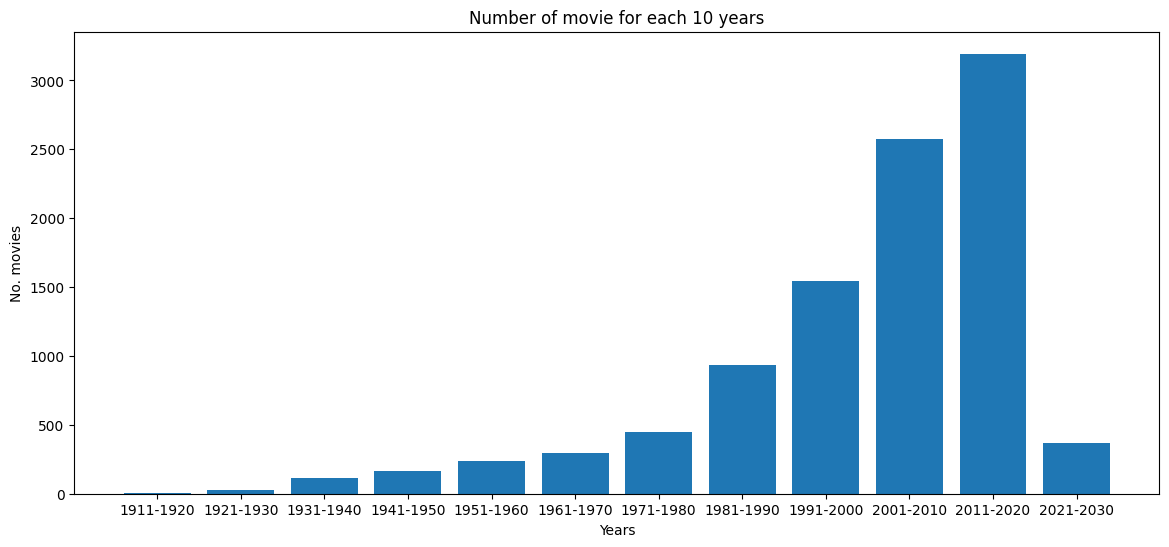

In [471]:
fig = plt.figure(figsize =(14, 6))
 
plt.bar(label,df['range'].value_counts().sort_index())
 
plt.xlabel("Years")
plt.ylabel("No. movies")
plt.title("Number of movie for each 10 years")
plt.show()

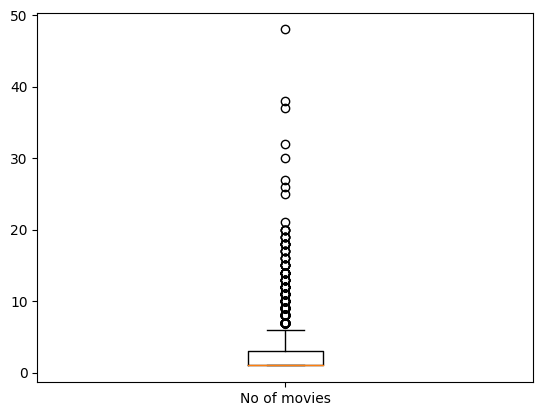

In [499]:
plt.boxplot(df['director'].value_counts().reset_index()['director'])
plt.xticks([1], ['No of movies'])
plt.show()

<BarContainer object of 15 artists>

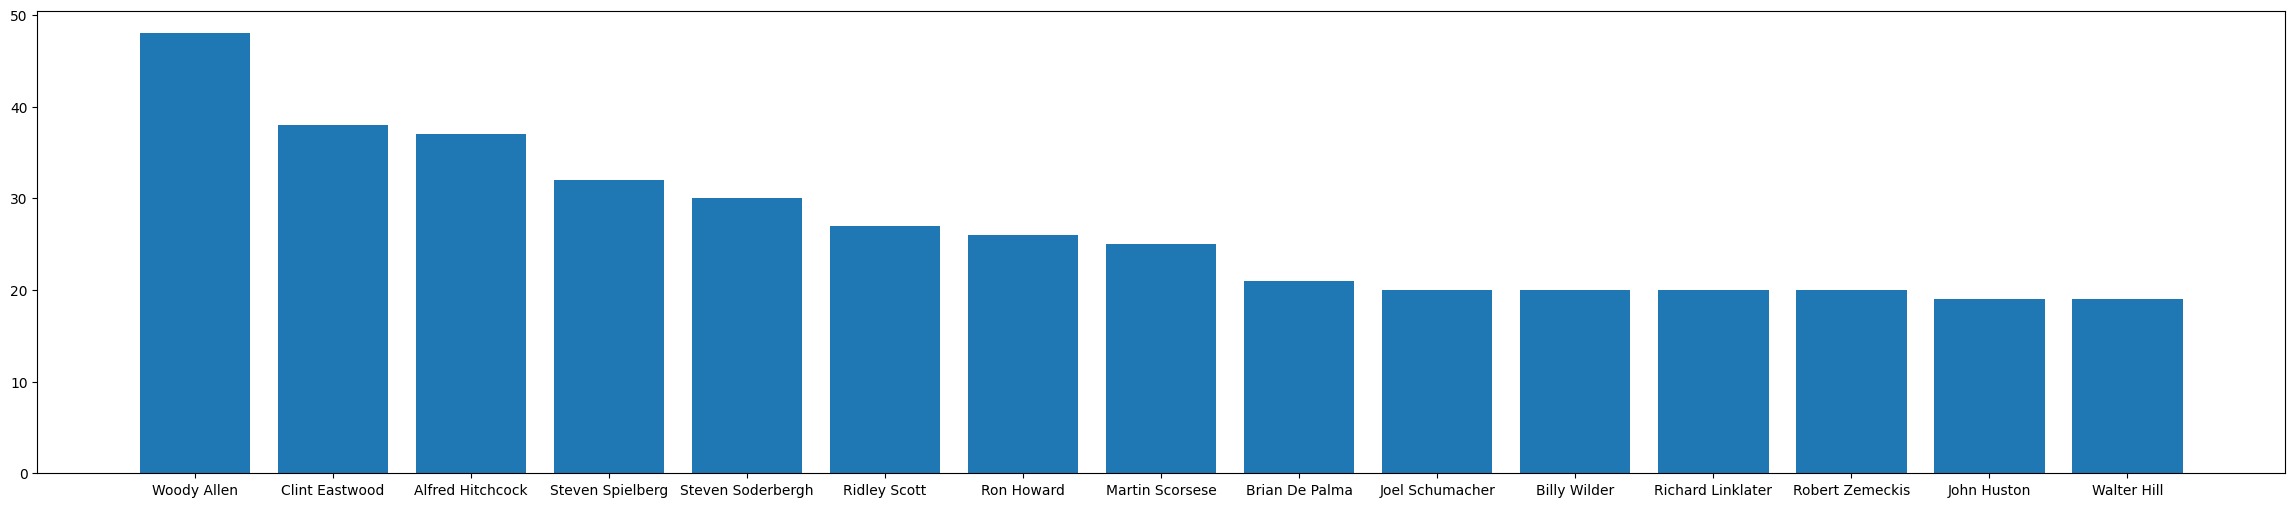

In [492]:
fig = plt.figure(figsize =(29, 6))
 
plt.bar(df['director'].value_counts().reset_index()['index'].str[2:-2].head(15),df['director'].value_counts().reset_index()['director'].head(15))


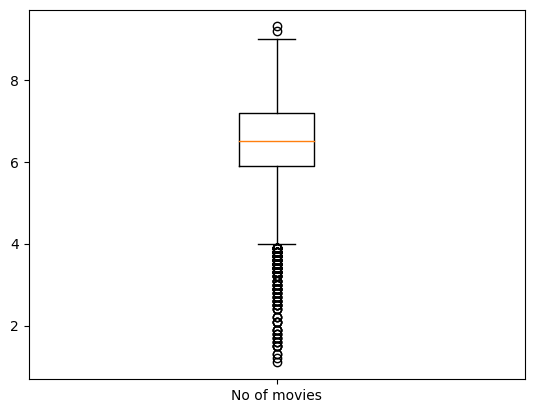

In [504]:
plt.boxplot(df['imdb_ratings'])
plt.xticks([1], ['No of movies'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1dcad2054f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dcad205a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dcad2052b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dcad205f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dcad212220>],
 'means': []}

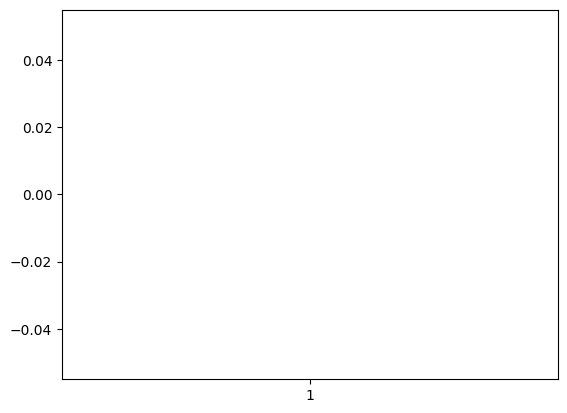

In [508]:
plt.boxplot(df['meta_scores'].astype(float))

In [511]:
df[(df['meta_scores']>=0)]

,Unnamed: 0,titles,year,imdb_ratings,text_muted1,text_muted2,text_muted3,meta_scores,director,stars,brief,rating,genre,runtime,votes,gross,range
0,0,The Shawshank Redemption,1994,9.3,R|142 min|Drama,\nTwo imprisoned men bond over a number of yea...,"Votes:2,647,314| Gross:$28.34M",81.0,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Two imprisoned men bond over a number of years...,R,Drama,142 min,"2,647,314",28.34,8
1,1,The Godfather,1972,9.2,"175 min|Crime, Drama",\nThe aging patriarch of an organized crime dy...,"Votes:1,835,072| Gross:$134.97M",100.0,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...",The aging patriarch of an organized crime dyna...,None,"Crime,Drama",175 min,"1,835,072",134.97,6
2,2,The Dark Knight,2008,9.0,"PG-13|152 min|Action, Crime, Drama",\nWhen the menace known as the Joker wreaks ha...,"Votes:2,619,277| Gross:$534.86M",84.0,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",When the menace known as the Joker wreaks havo...,PG-13,"Action,Crime,Drama",152 min,"2,619,277",534.86,9
3,3,The Lord of the Rings: The Return of the King,2003,9.0,"PG-13|201 min|Action, Adventure, Drama ...",\nGandalf and Aragorn lead the World of Men ag...,"Votes:1,823,184| Gross:$377.85M",94.0,['Peter Jackson'],"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",Gandalf and Aragorn lead the World of Men agai...,PG-13,"Action,Adventure,Drama",201 min,"1,823,184",377.85,9
4,4,Schindler's List,1993,9.0,"R|195 min|Biography, Drama, History",\nIn German-occupied Poland during World War I...,"Votes:1,341,758| Gross:$96.90M",94.0,['Steven Spielberg'],"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...","In German-occupied Poland during World War II,...",R,"Biography,Drama,History",195 min,"1,341,758",96.90,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881,9881,The Hottie & the Nottie,2008,1.9,"PG-13|91 min|Comedy, Romance",\nA woman agrees to go on a date with a man on...,"Votes:38,384| Gross:$0.03M",7.0,['Tom Putnam'],"['Paris Hilton', 'Joel David Moore', 'Christin...",A woman agrees to go on a date with a man only...,PG-13,"Comedy,Romance",91 min,"38,384",0.03,9
9882,9882,From Justin to Kelly,2003,1.9,"PG|81 min|Comedy, Musical, Romance",\nA waitress from Texas and a college student ...,"Votes:26,497| Gross:$4.92M",14.0,['Robert Iscove'],"['Kelly Clarkson', 'Justin Guarini', 'Katherin...",A waitress from Texas and a college student fr...,PG,"Comedy,Musical,Romance",81 min,"26,497",4.92,9
9886,9886,The Oogieloves in the Big Balloon Adventure,2012,1.7,"88 min|Adventure, Family, Fantasy","\nThe Oogieloves, Goobie, Zoozie, and Toofie, ...","Votes:15,347| Gross:$1.06M",32.0,['Matthew Diamond'],"['Jaime Pressly', 'Cloris Leachman', 'Christop...","The Oogieloves, Goobie, Zoozie, and Toofie, se...",None,"Adventure,Family,Fantasy",88 min,"15,347",1.06,10
9895,9895,Superbabies: Baby Geniuses 2,2004,1.5,"PG|88 min|Comedy, Family, Sci-Fi",\nA group of smart-talking toddlers find thems...,"Votes:31,108| Gross:$9.11M",9.0,['Bob Clark'],"['Jon Voight', 'Scott Baio', 'Vanessa Angel', ...",A group of smart-talking toddlers find themsel...,PG,"Comedy,Family,Sci-Fi",88 min,"31,108",9.11,9
